# Problem statement

The aim is to develop an algorithm to predict whether a tweet is about a real disaster or not.

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Review,Type
0,মা মেয়ের একটি সকাল.আড্ডা আর মজার নাস্তা.আজ আম...,very good
1,আমি ফুডপান্ডায় অর্ডার দিলাম এবং খাবার দেখে আম...,bad
2,বৃষ্টির দিনে স্ট্রিটফুড খেতে কার না ভালো লাগে ...,very good
3,আজকে এই প্রথমবার জিনজিরা ফেরিঘাট থেকে আসার পথে...,very good
4,পছন্দের রেস্টুরেন্ট এর মধ্যে একটা হলো Chicken...,very good


In [3]:
mapping = {'bad': 0, 'good': 1, 'very good': 2}
df['Type'] = df['Type'].map(mapping)
df

,Review,Type
0,মা মেয়ের একটি সকাল.আড্ডা আর মজার নাস্তা.আজ আম...,2
1,আমি ফুডপান্ডায় অর্ডার দিলাম এবং খাবার দেখে আম...,0
2,বৃষ্টির দিনে স্ট্রিটফুড খেতে কার না ভালো লাগে ...,2
3,আজকে এই প্রথমবার জিনজিরা ফেরিঘাট থেকে আসার পথে...,2
4,পছন্দের রেস্টুরেন্ট এর মধ্যে একটা হলো Chicken...,2
...,...,...
109,"মেইন কোর্সে ছিলো খিচুড়ি, খাসির বিরিয়ানি, বীফ র...",1
110,বেশ অনেকদিন থেকেই যাওয়ার ইচ্ছা ছিলো। এট লাস্ট ...,1
111,রিফিলের অবস্থা খুবই বাজে।ব্যুফের সময় ১:০০ টা ব...,0
112,The Pan Pacific Lounge এ গতকাল একটি নেগেটিভ রি...,0


C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from current font.
  func(*args, **kwargs)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Matplotlib currently does not support Bengali natively.
  func(*args, **kwargs)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  func(*args, **kwargs)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.
  func(*args, **kwargs)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2479 (\N{BENGALI LETTER YA}) missing from current font.
  func(*args, **kwargs)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2492 (\N{BENGALI SIGN NUKTA}) missing from current font.
  func(*

C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2538 (\N{BENGALI DIGIT FOUR}) missing from current font.
  func(*args, **kwargs)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2542 (\N{BENGALI DIGIT EIGHT}) missing from current font.
  func(*args, **kwargs)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  func(*args, **kwargs)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2461 (\N{BENGALI LETTER JHA}) missing from current font.
  func(*args, **kwargs)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 129316 (\N{DROOLING FACE}) missing from current font.
  func(*args, **kwargs)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2551 (\N{BENGALI CURRENCY NUMERATOR FOUR}) missing from current font.
  

C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2538 (\N{BENGALI DIGIT FOUR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2542 (\N{BENGALI DIGIT EIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2461 (\N{BENGALI LETTER JHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pirat\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129316 (\N{DROOLING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pirat\anaconda3\Lib\site-packages\IPy

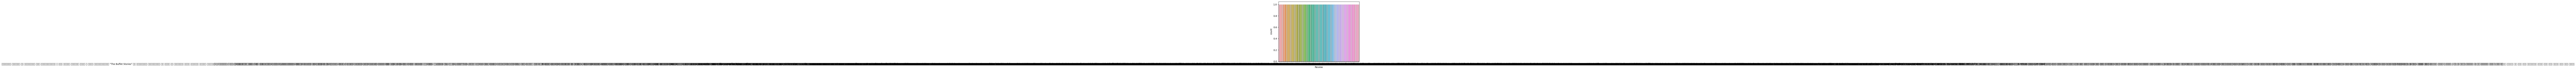

In [7]:
ax = sns.countplot(x="Review", data=df)

There is no class imbalance in the distribution of target variable.

# Data Clensing

We are using custom functions to perform the following tasks. Cleaning up the data for modeling should be carried out carefully and with the help of subject matter experts, if possible. This cleaning is done completely based on observation, and can not be considered as a generic preprocessing step for all the NLP tasks. This preprocessing function ensures:

* Removing urls from tweet
* Removing html tags
* Removing punctuations
* Removing stopwords
* Removing emoji
* Lemmatization

In [4]:
def clean_text(text):
    
  
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis
    
    return text

In [5]:
df['Review'] = df['Review'].apply(lambda x: clean_text(x))
 
df.head()

,Review,Type
0,মা মেয়ের একটি সকাল.আড্ডা আর মজার নাস্তা.আজ আম...,2
1,আমি ফুডপান্ডায় অর্ডার দিলাম এবং খাবার দেখে আম...,0
2,বৃষ্টির দিনে স্ট্রিটফুড খেতে কার না ভালো লাগে ...,2
3,আজকে এই প্রথমবার জিনজিরা ফেরিঘাট থেকে আসার পথে...,2
4,পছন্দের রেস্টুরেন্ট এর মধ্যে একটা হলো Chicken...,2


# Words to vectors

Reference

https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795

https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af

We need to convert the words to numeric representations, to use them as input to our machine learning model. One way to do this is:

## Count Vectorizer
The most basic and naive method of transforming words into vectors by counting occurrence of each word in each document. The output is a document-term matrix with each row representing a document and each column addressing a token (weight assigned to each token based on counting the occurence). 

For example:

In [14]:
sample_corpora = df['Review'].iloc[:2].values
sample_corpora

array(['মা মেয়ের একটি সকাল.আড্ডা আর মজার নাস্তা.আজ আমরা গিয়েছিলাম বনেদি তে নাস্তা খেতে।বেশ ভালো লেগেছে।পুরো রেস্টুরেন্ট টি দেশীও ঘরানার সাজানো গুছানো পরিপাটি।খাবারের স্বাদ বেশ ভালো দাম ও রিজনেবল।স্টাফ দের ব্যাবহার ভালো।মোট কথা পরিবার পরিজন বা বন্ধুদের নিয়ে বসে আড্ডা আর খাবার জন্য বেশ ভালো একটি রেস্টুরেন্ট।',
       'আমি ফুডপান্ডায় অর্ডার দিলাম এবং খাবার দেখে আমি উত্তেজনায় ভরে উঠলাম। যাইহোক, খাবারের মান অবিশ্বাস্যভাবে ভয়ঙ্কর হয়ে উঠেছে, কারণ এটি সম্পূর্ণ করতে আমার মাত্র 2 মিনিট সময় লেগেছে। ফুড পান্ডা কর্তৃপক্ষের একজন প্রতিনিধি উপস্থিত থাকলে, আমি একটি বিষয় আপনার নজরে আনতে চাই - অনুগ্রহ করে রেস্টুরেন্টটি পরিদর্শন করুন। আমি ডেলিভারি পার্সনের কাছ থেকে জেনেছি যে খাবারটি তাদের কাছে একটি শারীরিক দোকানের পরিবর্তে একটি ব্যক্তিগত বাসভবন থেকে হস্তান্তর করা হয়েছিল। এটি সম্পূর্ণরূপে বাড়িতে তৈরি খাবার ছিল। আমি আজকে ফুডপান্ডার মতো সহজ/উবার/পাথি বা অন্য কোনও খাবার বিতরণ পরিষেবা নিয়ে এমন হতাশাজনক অভিজ্ঞতা কখনও পাইনি।'],
      dtype=object)

In [15]:
count_vectorizer = CountVectorizer()
wm = count_vectorizer.fit_transform(sample_corpora)

doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
feat_names = count_vectorizer.get_feature_names()


sample_df = pd.DataFrame(data=wm.toarray(), index=doc_names,columns=feat_names)
sample_df

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

## TF-IDF Vectorizer

Taking only word count in document have certain drawbacks. The presence of frequent word vectors wont be sparse (espicially stopwords), though the word may not be important. Also, rare words looks very sparse, hence less importance. To tackle these problems, we use TF-IDF vectorization. 

The first part is **TF**, called term frequency. This simply means the number of times the word occur in document divided by the total number of words in the document. 

The second part is **IDF**, which stands for ‘inverse document frequency’, interpreted like inversed number of documents, in which the term we’re interested in occurs.

**$tf(t,d)$**  is the term frequency is the number of times the term appears in the document.

**$$tf(t,d) = {n_{t,d} \over \sum_{{k \in d}} n_{k,d}} $$**


Where, $t$ is term and $d$ document.


**$idf(t,D)$** is the document frequency is the number of documents '**d**' that contain term '**t**'.

**$$idf(t,D) = {log {N\over{n_t}}}$$**

**$$d \in D, t \in d $$**


where **$N$** is the total number of documents and **$n_t$** is the number of documents containing the term $t$.

The **TF-IDF** vector,

**$$tfidf(t,d,D) = tf(t,d) * idf(t,D)$$**


### Smoothing

An idf is constant per corpus for a word. A smoothened version, adding 1 to denominator is applied to avoid division by 0 (occurs when term is not present in corpora). The idea of idf is to weight down the frequent terms while scale up the rare ones, assuming more frequent ones are not always important ones. So, smoothened idf equation is:

**$$idf(t,D) = {log {N\over{1 + n_t}}}$$**

NB : smoothing is set True as default in scikit learn tfidf vectorizer

# TF-IDF Vectorization using scikit learn

We will split the data to train and test set. In production, we may face out of vocabulary (OOV) words, so we need to account for that too while evaluating the model in test set. Hence we use training data to built vocabulory for tfidf vectorization.

Tfidf vectorization can be implemented easily using scikit learn.

Ref - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [6]:
X_train, X_test , y_train, y_test = train_test_split(df['Review'].values,df['Type'].values,test_size=0.2,random_state=12,stratify=df['Type'].values)

In [9]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

# Random Forest classifier

A basic random forest model is used for classification problem.

In [10]:
classifier = RandomForestClassifier()

classifier.fit(tfidf_train_vectors,y_train)

RandomForestClassifier()

In [11]:
y_pred = classifier.predict(tfidf_test_vectors)

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.75      0.71         8
           2       0.71      0.83      0.77        12

    accuracy                           0.70        23
   macro avg       0.46      0.53      0.49        23
weighted avg       0.60      0.70      0.65        23



C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svc

In [13]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine classifier
svm_classifier = SVC()

# Train the classifier using the TF-IDF vectors and corresponding labels
svm_classifier.fit(tfidf_train_vectors, y_train)
y_pred = classifier.predict(tfidf_test_vectors)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.75      0.71         8
           2       0.71      0.83      0.77        12

    accuracy                           0.70        23
   macro avg       0.46      0.53      0.49        23
weighted avg       0.60      0.70      0.65        23



C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
nb

In [14]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier using the TF-IDF vectors and corresponding labels
nb_classifier.fit(tfidf_train_vectors, y_train)

# Predict using the trained classifier
y_pred_nb = nb_classifier.predict(tfidf_test_vectors)

# Import classification report
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.12      0.22         8
           2       0.55      1.00      0.71        12

    accuracy                           0.57        23
   macro avg       0.52      0.38      0.31        23
weighted avg       0.63      0.57      0.45        23



C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dt

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier using the TF-IDF vectors and corresponding labels
dt_classifier.fit(tfidf_train_vectors, y_train)

# Predict using the trained classifier
y_pred_dt = dt_classifier.predict(tfidf_test_vectors)

# Print classification report
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.38      0.38      0.38         8
           2       0.62      0.42      0.50        12

    accuracy                           0.43        23
   macro avg       0.43      0.49      0.42        23
weighted avg       0.49      0.43      0.44        23



In [ ]:
lg

In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression()

# Train the classifier using the TF-IDF vectors and corresponding labels
lr_classifier.fit(tfidf_train_vectors, y_train)

# Predict using the trained classifier
y_pred_lr = lr_classifier.predict(tfidf_test_vectors)

# Print classification report
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.75      0.38      0.50         8
           2       0.58      0.92      0.71        12

    accuracy                           0.61        23
   macro avg       0.44      0.43      0.40        23
weighted avg       0.56      0.61      0.54        23



C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier using the TF-IDF vectors and corresponding labels
knn_classifier.fit(tfidf_train_vectors, y_train)

# Predict using the trained classifier
y_pred_knn = knn_classifier.predict(tfidf_test_vectors)

# Print classification report
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      0.75      0.60         8
           2       0.55      0.50      0.52        12

    accuracy                           0.52        23
   macro avg       0.35      0.42      0.37        23
weighted avg       0.46      0.52      0.48        23



C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
gb

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Train the classifier using the TF-IDF vectors and corresponding labels
gb_classifier.fit(tfidf_train_vectors, y_train)

# Predict using the trained classifier
y_pred_gb = gb_classifier.predict(tfidf_test_vectors)

# Print classification report
print(classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.44      0.50      0.47         8
           2       0.50      0.50      0.50        12

    accuracy                           0.43        23
   macro avg       0.31      0.33      0.32        23
weighted avg       0.42      0.43      0.42        23



In [ ]:
mlp

In [19]:
from sklearn.neural_network import MLPClassifier

# Initialize the Multilayer Perceptron classifier
mlp_classifier = MLPClassifier()

# Train the classifier using the TF-IDF vectors and corresponding labels
mlp_classifier.fit(tfidf_train_vectors, y_train)

# Predict using the trained classifier
y_pred_mlp = mlp_classifier.predict(tfidf_test_vectors)

# Print classification report
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.78      0.88      0.82         8
           2       0.79      0.92      0.85        12

    accuracy                           0.78        23
   macro avg       0.52      0.60      0.56        23
weighted avg       0.68      0.78      0.73        23



C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-

In [ ]:
gnb

In [20]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier using the TF-IDF vectors and corresponding labels
nb_classifier.fit(tfidf_train_vectors.toarray(), y_train)

# Predict using the trained classifier
y_pred_nb = nb_classifier.predict(tfidf_test_vectors.toarray())

# Print classification report
print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.83      0.62      0.71         8
           2       0.71      1.00      0.83        12

    accuracy                           0.74        23
   macro avg       0.51      0.54      0.51        23
weighted avg       0.66      0.74      0.68        23



C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
PassiveAggresive

In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Initialize the Passive Aggressive Classifier
pa_classifier = PassiveAggressiveClassifier()

# Train the classifier using the TF-IDF vectors and corresponding labels
pa_classifier.fit(tfidf_train_vectors, y_train)

# Predict using the trained classifier
y_pred_pa = pa_classifier.predict(tfidf_test_vectors)

# Print classification report
print(classification_report(y_test, y_pred_pa))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.60      0.75      0.67         8
           2       0.69      0.75      0.72        12

    accuracy                           0.65        23
   macro avg       0.43      0.50      0.46        23
weighted avg       0.57      0.65      0.61        23



C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
adaboost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier()

# Train the classifier using the TF-IDF vectors and corresponding labels
adaboost_classifier.fit(tfidf_train_vectors, y_train)

# Predict using the trained classifier
y_pred_adaboost = adaboost_classifier.predict(tfidf_test_vectors)

# Print classification report
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      0.50      0.50         8
           2       0.67      0.83      0.74        12

    accuracy                           0.61        23
   macro avg       0.39      0.44      0.41        23
weighted avg       0.52      0.61      0.56        23



C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
QuadraticDiscriminantAnalysis

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Initialize the Quadratic Discriminant Analysis (QDA) classifier
qda_classifier = QuadraticDiscriminantAnalysis()

# Train the classifier using the TF-IDF vectors and corresponding labels
qda_classifier.fit(tfidf_train_vectors.toarray(), y_train)

# Predict using the trained classifier
y_pred_qda = qda_classifier.predict(tfidf_test_vectors.toarray())

# Print classification report
print(classification_report(y_test, y_pred_qda))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.50      0.62      0.56         8
           2       0.73      0.67      0.70        12

    accuracy                           0.61        23
   macro avg       0.58      0.54      0.55        23
weighted avg       0.62      0.61      0.61        23



C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
LinearDiscriminantAnalysis

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize the Linear Discriminant Analysis (LDA) classifier
lda_classifier = LinearDiscriminantAnalysis()

# Train the classifier using the TF-IDF vectors and corresponding labels
lda_classifier.fit(tfidf_train_vectors.toarray(), y_train)

# Predict using the trained classifier
y_pred_lda = lda_classifier.predict(tfidf_test_vectors.toarray())

# Print classification report
print(classification_report(y_test, y_pred_lda))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      0.12      0.18         8
           2       0.55      0.92      0.69        12

    accuracy                           0.52        23
   macro avg       0.29      0.35      0.29        23
weighted avg       0.40      0.52      0.42        23



C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('train.csv')

# Map sentiment labels to numerical values
mapping = {'bad': 0, 'good': 1, 'very good': 2}
df['Type'] = df['Type'].map(mapping)

# Define a function to clean text data
def clean_text(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) # Removing emojis
    return text

# Clean the text data
df['Review'] = df['Review'].apply(lambda x: clean_text(x))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'].values, df['Type'].values, test_size=0.2, random_state=12, stratify=df['Type'].values)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

# Reshape TF-IDF vectors to fit the Conv1D input shape
tfidf_train_vectors = tfidf_train_vectors.reshape((tfidf_train_vectors.shape[0], tfidf_train_vectors.shape[1], 1))
tfidf_test_vectors = tfidf_test_vectors.reshape((tfidf_test_vectors.shape[0], tfidf_test_vectors.shape[1], 1))

# Define the CNN model architecture
model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(tfidf_train_vectors.shape[1], 1)),
    MaxPooling1D(5),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(tfidf_train_vectors, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(tfidf_test_vectors, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predict using the trained model
y_pred = np.argmax(model.predict(tfidf_test_vectors), axis=-1)

# Print classification report
print(classification_report(y_test, y_pred))


ValueError: matrix shape must be two-dimensional

In [26]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('train.csv')

# Map sentiment labels to numerical values
mapping = {'bad': 0, 'good': 1, 'very good': 2}
df['Type'] = df['Type'].map(mapping)

# Define a function to clean text data
def clean_text(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) # Removing emojis
    return text

# Clean the text data
df['Review'] = df['Review'].apply(lambda x: clean_text(x))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'].values, df['Type'].values, test_size=0.2, random_state=12, stratify=df['Type'].values)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

# Convert TF-IDF vectors to dense arrays
tfidf_train_vectors = tfidf_train_vectors.toarray()
tfidf_test_vectors = tfidf_test_vectors.toarray()

# Reshape TF-IDF vectors to fit the Conv1D input shape
tfidf_train_vectors = tfidf_train_vectors.reshape((tfidf_train_vectors.shape[0], tfidf_train_vectors.shape[1], 1))
tfidf_test_vectors = tfidf_test_vectors.reshape((tfidf_test_vectors.shape[0], tfidf_test_vectors.shape[1], 1))

# Define the CNN model architecture
model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(tfidf_train_vectors.shape[1], 1)),
    MaxPooling1D(5),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(tfidf_train_vectors, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(tfidf_test_vectors, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predict using the trained model
y_pred = np.argmax(model.predict(tfidf_test_vectors), axis=-1)

# Print classification report
print(classification_report(y_test, y_pred))


Epoch 1/5
2/2 [==============================] - 1s 227ms/step - loss: 1.0943 - accuracy: 0.4568 - val_loss: 1.0629 - val_accuracy: 0.6000
Epoch 2/5
2/2 [==============================] - 0s 53ms/step - loss: 1.0680 - accuracy: 0.5062 - val_loss: 1.0334 - val_accuracy: 0.6000
Epoch 3/5
2/2 [==============================] - 0s 47ms/step - loss: 1.0432 - accuracy: 0.5062 - val_loss: 1.0017 - val_accuracy: 0.6000
Epoch 4/5
2/2 [==============================] - 0s 62ms/step - loss: 1.0302 - accuracy: 0.5062 - val_loss: 0.9697 - val_accuracy: 0.6000
Epoch 5/5
1/1 [==============================] - 0s 26ms/step - loss: 0.9815 - accuracy: 0.5217
Test Loss: 0.9814775586128235, Test Accuracy: 0.52173912525177
1/1 [==============================] - 0s 111ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         8
           2       0.52      1.00      0.69        12

    accuracy     

C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('train.csv')

# Map sentiment labels to numerical values
mapping = {'bad': 0, 'good': 1, 'very good': 2}
df['Type'] = df['Type'].map(mapping)

# Define a function to clean text data
def clean_text(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) # Removing emojis
    return text

# Clean the text data
df['Review'] = df['Review'].apply(lambda x: clean_text(x))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'].values, df['Type'].values, test_size=0.2, random_state=12, stratify=df['Type'].values)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

# Convert TF-IDF vectors to dense arrays
tfidf_train_vectors = tfidf_train_vectors.toarray()
tfidf_test_vectors = tfidf_test_vectors.toarray()

# Reshape TF-IDF vectors to fit the Conv1D input shape
tfidf_train_vectors = tfidf_train_vectors.reshape((tfidf_train_vectors.shape[0], tfidf_train_vectors.shape[1], 1))
tfidf_test_vectors = tfidf_test_vectors.reshape((tfidf_test_vectors.shape[0], tfidf_test_vectors.shape[1], 1))

# Define the CNN model architecture
model = Sequential([
    Conv1D(256, 5, activation='relu', input_shape=(tfidf_train_vectors.shape[1], 1)),
    MaxPooling1D(5),
    Conv1D(256, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(tfidf_train_vectors, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(tfidf_test_vectors, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predict using the trained model
y_pred = np.argmax(model.predict(tfidf_test_vectors), axis=-1)

# Print classification report
print(classification_report(y_test, y_pred))


Epoch 1/10
2/2 [==============================] - 1s 235ms/step - loss: 1.0988 - accuracy: 0.3086 - val_loss: 1.0795 - val_accuracy: 0.6000
Epoch 2/10
2/2 [==============================] - 0s 86ms/step - loss: 1.0813 - accuracy: 0.5309 - val_loss: 1.0454 - val_accuracy: 0.6000
Epoch 3/10
2/2 [==============================] - 0s 85ms/step - loss: 1.0591 - accuracy: 0.5185 - val_loss: 0.9953 - val_accuracy: 0.6000
Epoch 4/10
2/2 [==============================] - 0s 83ms/step - loss: 1.0288 - accuracy: 0.5309 - val_loss: 0.9414 - val_accuracy: 0.6000
Epoch 5/10
2/2 [==============================] - 0s 85ms/step - loss: 0.9836 - accuracy: 0.5309 - val_loss: 0.9101 - val_accuracy: 0.6000
Epoch 6/10
2/2 [==============================] - 0s 84ms/step - loss: 1.0261 - accuracy: 0.5185 - val_loss: 0.9114 - val_accuracy: 0.6000
Epoch 7/10
2/2 [==============================] - 0s 95ms/step - loss: 1.0466 - accuracy: 0.5432 - val_loss: 0.9101 - val_accuracy: 0.6000
Epoch 8/10
2/2 [==========

C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pirat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic data
num_samples = 10000
reviews = []
labels = []
for _ in range(num_samples):
    review = ''.join(np.random.choice(list(string.ascii_lowercase + ' '), np.random.randint(10, 100)))
    rating = np.random.choice(['bad', 'good', 'very good'])
    reviews.append(review)
    labels.append(rating)

df = pd.DataFrame({'Review': reviews, 'Type': labels})

# Map sentiment labels to numerical values
mapping = {'bad': 0, 'good': 1, 'very good': 2}
df['Type'] = df['Type'].map(mapping)

# Define a function to clean text data
def clean_text(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) # Removing emojis
    return text

# Clean the text data
df['Review'] = df['Review'].apply(lambda x: clean_text(x))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'].values, df['Type'].values, test_size=0.2, random_state=42, stratify=df['Type'].values)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

# Convert TF-IDF vectors to dense arrays
tfidf_train_vectors = tfidf_train_vectors.toarray()
tfidf_test_vectors = tfidf_test_vectors.toarray()

# Reshape TF-IDF vectors to fit the Conv1D input shape
tfidf_train_vectors = tfidf_train_vectors.reshape((tfidf_train_vectors.shape[0], tfidf_train_vectors.shape[1], 1))
tfidf_test_vectors = tfidf_test_vectors.reshape((tfidf_test_vectors.shape[0], tfidf_test_vectors.shape[1], 1))

# Define the CNN model architecture
model = Sequential([
    Conv1D(256, 5, activation='relu', input_shape=(tfidf_train_vectors.shape[1], 1)),
    MaxPooling1D(5),
    Conv1D(256, 5, activation='relu'),
    MaxPooling1D(5),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(tfidf_train_vectors, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(tfidf_test_vectors, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predict using the trained model
y_pred = np.argmax(model.predict(tfidf_test_vectors), axis=-1)

# Print classification report
print(classification_report(y_test, y_pred))

Epoch 1/10
113/113 [==============================] - 593s 5s/step - loss: 1.1001 - accuracy: 0.3368 - val_loss: 1.0989 - val_accuracy: 0.3425
Epoch 2/10
113/113 [==============================] - 529s 5s/step - loss: 1.0988 - accuracy: 0.3313 - val_loss: 1.0991 - val_accuracy: 0.3162
Epoch 3/10
 69/113 [=================>............] - ETA: 3:09 - loss: 1.0987 - accuracy: 0.3471